In [90]:
import tensorflow as tf

In [91]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, UpSampling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from IPython.display import Image

In [92]:
(x_train,y_train), (x_test,y_test)=load_data()

In [93]:
x_train = x_train.reshape(-1,32,32,3)/255.0
x_test = x_test.reshape(-1,32,32,3)/255.0
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [96]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [97]:
transfer_model.trainable=False

In [98]:
model = Sequential()
model.add(transfer_model)
model.add(Conv2D(50, kernel_size=3, padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(50, kernel_size=3, padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(50, kernel_size=3, padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 1, 50)          230450    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 50)          22550     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 50)         

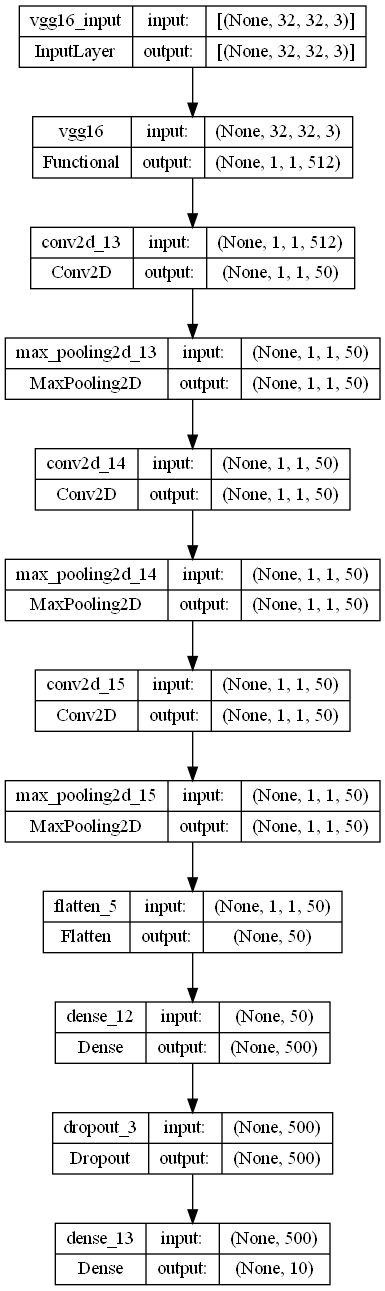

In [100]:
plot_model(model, show_shapes=True)

In [101]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [102]:
model.fit(x_train, y_train,epochs=30,validation_data=(x_val,y_val),validation_batch_size=200)

Epoch 1/30
1250/1250 [==============================] - 195s 155ms/step - loss: 1.4691 - accuracy: 0.4712 - val_loss: 1.2740 - val_accuracy: 0.5482
Epoch 2/30
1250/1250 [==============================] - 199s 159ms/step - loss: 1.2836 - accuracy: 0.5477 - val_loss: 1.2763 - val_accuracy: 0.5532
Epoch 3/30
1250/1250 [==============================] - 197s 158ms/step - loss: 1.2372 - accuracy: 0.5675 - val_loss: 1.2385 - val_accuracy: 0.5646
Epoch 4/30
1250/1250 [==============================] - 198s 158ms/step - loss: 1.2104 - accuracy: 0.5767 - val_loss: 1.2038 - val_accuracy: 0.5776
Epoch 5/30
1250/1250 [==============================] - 198s 159ms/step - loss: 1.1930 - accuracy: 0.5829 - val_loss: 1.2050 - val_accuracy: 0.5775
Epoch 6/30
1250/1250 [==============================] - 198s 159ms/step - loss: 1.1874 - accuracy: 0.5878 - val_loss: 1.1918 - val_accuracy: 0.5817
Epoch 7/30
1250/1250 [==============================] - 196s 157ms/step - loss: 1.1740 - accuracy: 0.5936 - val_

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_val,y_val)

In [ ]:
pretest=model.predict(x_test[3].reshape(-1,32,32,3))

In [ ]:
import PIL.Image as pilimg

In [ ]:
image = pilimg.open('cat.jpg')
pix = np.array(image)

In [ ]:
plt.imshow(pix)
plt.show()

In [ ]:
np.round(model.predict((pix/255.0).reshape(-1,32,32,3)))

In [ ]:
image1 = pilimg.open('airplane.jpg')
pix1 = np.array(image1)

In [ ]:
plt.imshow(pix1)
plt.show()

In [ ]:
np.round(model.predict((pix1/255.0).reshape(-1,32,32,3)))